In the insurance industry,acquiring new customers and converting leads into salesis
 crucial for business growth.The dataset provided contains information about a series
 of marketing calls made to potential customers by an insurance company.The goal is
 to predict whether a customer will subscribe to an insurance policy based on various
 attributes of the customer and details of the marketing interactions.

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/main/insurance_dataset.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [ ]:
print(df.dtypes)

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
Outcome           object
dtype: object


In [ ]:
df.count()

,0
age,45211
job,45211
marital,45211
education_qual,45211
call_type,45211
day,45211
mon,45211
dur,45211
num_calls,45211
prev_outcome,45211


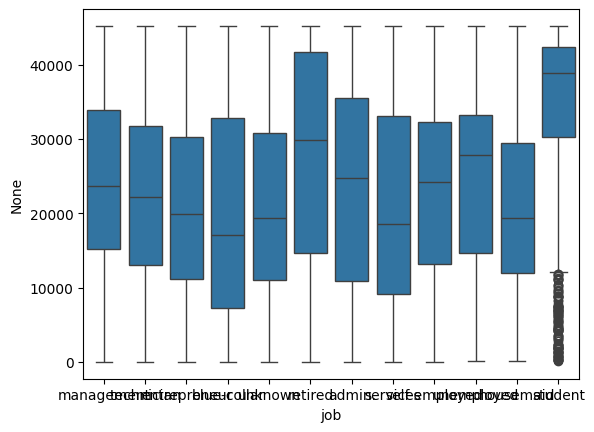

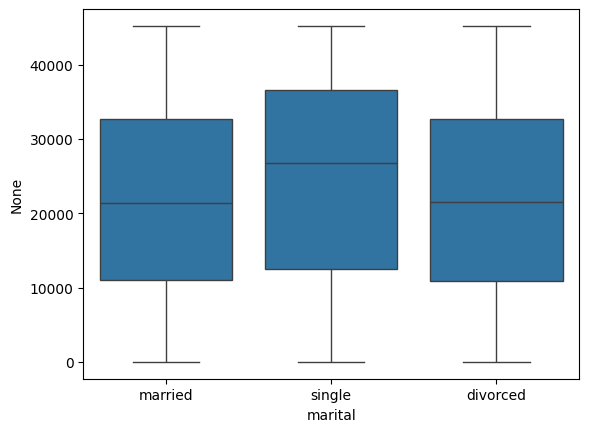

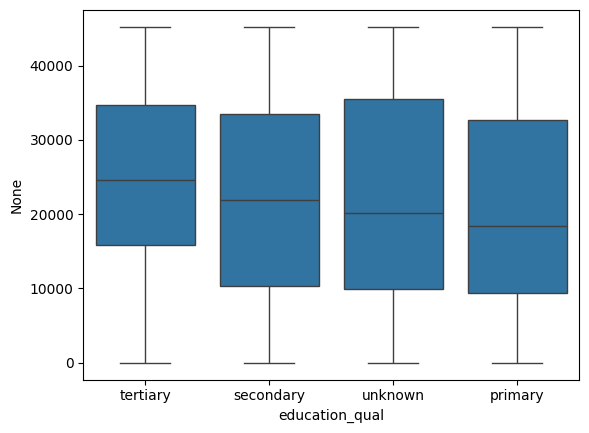

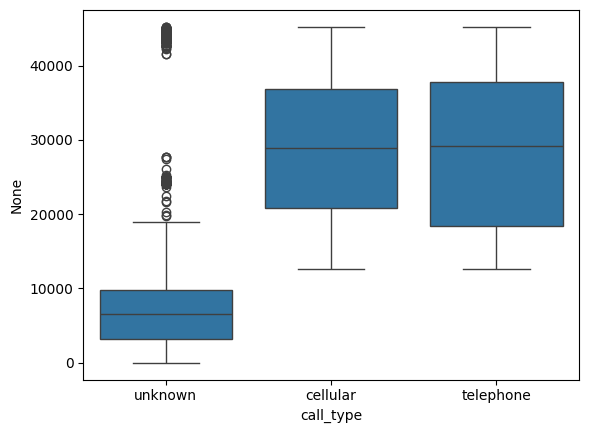

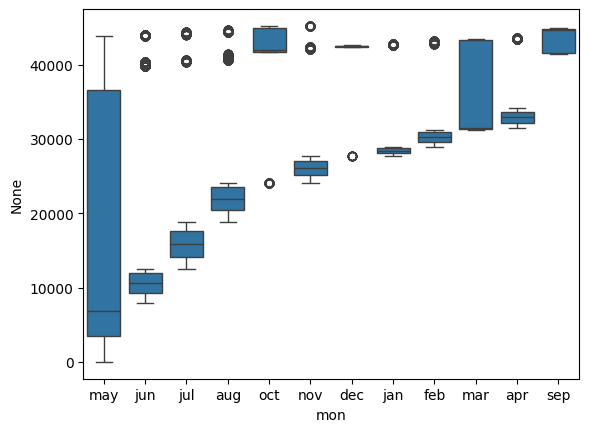

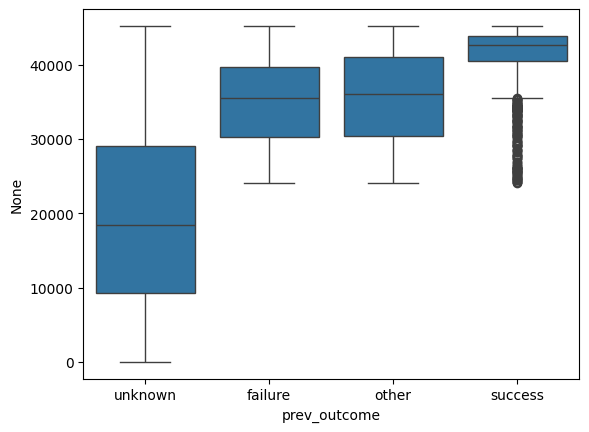

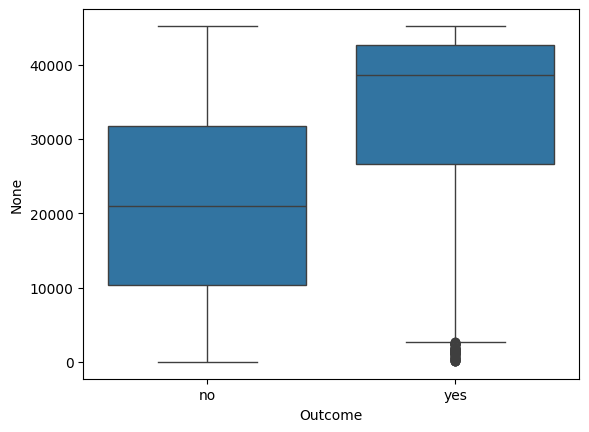

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

column=df.columns
for cols in column:
  if df[cols].dtype=='object':
   sns.boxplot(x=cols, y=df[cols].index, data=df)
   plt.show()

##Removingduplicates

In [ ]:
df.drop_duplicates(inplace=True)

df.shape


(45205, 11)

(19892, 10)
(8526, 10)
(19892,)
(8526,)


##Encoding for coverting string to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

for cols in df.columns:
  if df[cols].dtype==object:
    le=LabelEncoder()
    df[cols]=le.fit_transform(df[cols])


df.head()
df.shape

(45205, 11)

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,39922
1,5289


##Removing outliers using z score method

In [ ]:
from scipy import stats
import numpy as np

z_scores=stats.zscore(df.drop('Outcome',axis=1))
abs_z_scores=np.abs(z_scores)
filtered_entries=(abs_z_scores<3).all(axis=1)
df=df.loc[filtered_entries]
df['Outcome'].value_counts()

##SOMTE for balancing data

In [ ]:
from imblearn.over_sampling import SMOTE
x=df.drop('Outcome',axis=1)
y=df['Outcome']
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x,y)
df.shape


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


(43041, 11)

Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe
Not enough classes remaining after filtering. Returning original dataframe


,count
Outcome,
0,31563


##Removing outliers using z score method

In [ ]:
from scipy import stats
import numpy as np

z_scores=stats.zscore(df.drop('Outcome',axis=1))
abs_z_scores=np.abs(z_scores)
filtered_entries=(abs_z_scores<3).all(axis=1)
df=df.loc[filtered_entries]
df['Outcome'].value_counts()

,count
Outcome,
0,38516
1,4525


##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53922, 10)
(23110, 10)
(53922,)
(23110,)


#Standard scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaled_data=MinMaxScaler()
x_train_scaled=scaled_data.fit_transform(x_train)
x_test_scaled=scaled_data.fit_transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)



##Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
log_model=LogisticRegression()
log_model.fit(x_train_scaled,y_train)

def predict_threshold(model,x_data,thr):
  return np.where(model.predict_proba(x_test_scaled)[:,1]>thr,1,0)
max_accuracy = 0
best_threshold = 0
accuracies=[]
for thr in np.arange(0,1,0.1):
  y_pred_thr=predict_threshold(log_model,x_test_scaled,thr)
  ##print(thr)
  accuracy=accuracy_score(y_pred_thr,y_test)
  ##print(accuracy)
  if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = thr
print(max_accuracy)
print(best_threshold)





0.7836001730852444
0.4


##KNN

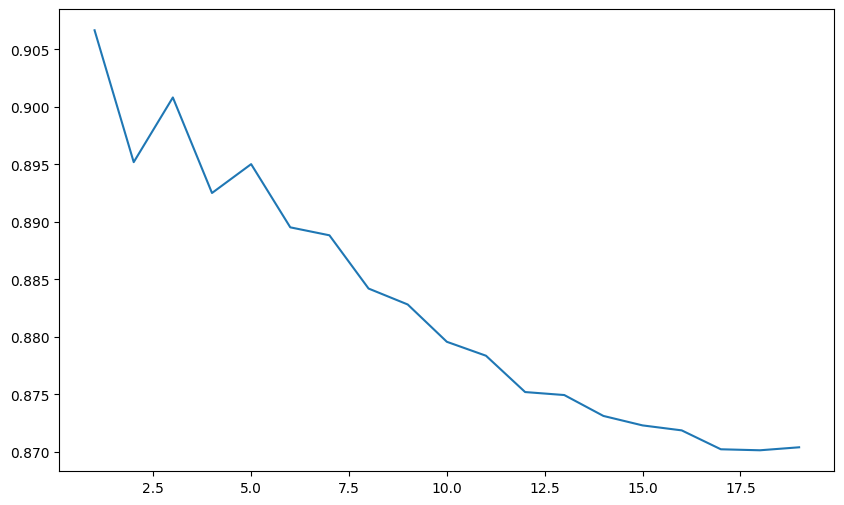

0.9008221549112938


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
accuracies=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn_model=knn.fit(x_train_scaled,y_train)
  y_pred=knn_model.predict(x_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  accuracies.append(accuracy)
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracies)
plt.show()

knn=KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(x_train_scaled,y_train)
y_pred=knn_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))





##DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

dt=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train)
print("Best parameters:",grid_search.best_params_)

dt=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_model=dt.fit(x_train_scaled,y_train)
y_pred=dt_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

Best parameters: {'criterion': 'gini', 'max_depth': 10}
0.844410119395508


##Randomforestclassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rfc=RandomForestClassifier()
param_grid={'n_estimators':[10,20,30,40,50,60],'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train)
print("Best parameters:",grid_search.best_params_)

rfc=RandomForestClassifier()
rfc_model=rfc.fit()



Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 60}


In [ ]:
rfc=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=60)
rfc_model=rfc.fit(x_train_scaled,y_train)
y_pred=rfc_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8550555230859147
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     11973
           1       0.80      0.94      0.87     11981

    accuracy                           0.86     23954
   macro avg       0.87      0.86      0.85     23954
weighted avg       0.87      0.86      0.85     23954



In [ ]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_res,y_res=sm.fit_resample(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=51)
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x_train,y_train)

from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(x_res,y_res)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_pred=model1.predict(x_test)
print(accuracy_score(y_test,y_pred))





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0.7840607490415806


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(pd.Series(y_train).value_counts())

Outcome
0    28004
1     3643
Name: count, dtype: int64


In [ ]:
##Decision tree

from sklearn.tree import DecisionTreeClassifier

model2=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=43)
model2.fit(x_res,y_res)

y_pred=model2.predict(x_test)
print(accuracy_score(y_test,y_pred))



0.8484960188734887


In [ ]:
##Randomtreeclassifier

from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10,random_state=43)
model3.fit(x_res,y_res)

y_pred=model3.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8554261279858448
